In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
data = make_moons(noise=0.3, random_state=0)
X, y = data

In [3]:
data

(array([[ 0.03159499,  0.98698776],
        [ 2.11509784, -0.04624397],
        [ 0.88248972, -0.07575606],
        [-0.0551441 , -0.03733246],
        [ 0.82954503, -0.53932149],
        [ 2.11285708,  0.66208353],
        [ 0.5696927 ,  0.33744136],
        [ 0.95217454, -0.75307471],
        [-0.02922115,  0.39287336],
        [ 1.71579557,  0.36069454],
        [-0.27883014,  0.61420539],
        [ 2.00344509, -0.3091496 ],
        [ 1.50009616, -0.74636376],
        [ 1.22540835,  1.19793017],
        [ 0.46730819,  0.54703192],
        [-0.36653222,  1.11971633],
        [ 0.30124459,  1.23315697],
        [ 0.30430746,  0.82373935],
        [-0.23712492,  0.77876034],
        [ 1.16339832,  0.55290238],
        [-0.59702417,  0.6572361 ],
        [ 0.46356735, -0.1951543 ],
        [ 0.68451111,  0.75287685],
        [ 0.70515699, -0.45892444],
        [-0.65805008, -0.12944211],
        [-0.74662946, -0.3829632 ],
        [ 0.60585226,  0.31252842],
        [ 2.18137168, -0.022

In [4]:
dataset = np.hstack((X,y.reshape((-1,1))))

In [5]:
dataset

array([[ 0.03159499,  0.98698776,  0.        ],
       [ 2.11509784, -0.04624397,  1.        ],
       [ 0.88248972, -0.07575606,  0.        ],
       [-0.0551441 , -0.03733246,  1.        ],
       [ 0.82954503, -0.53932149,  1.        ],
       [ 2.11285708,  0.66208353,  1.        ],
       [ 0.5696927 ,  0.33744136,  0.        ],
       [ 0.95217454, -0.75307471,  1.        ],
       [-0.02922115,  0.39287336,  1.        ],
       [ 1.71579557,  0.36069454,  1.        ],
       [-0.27883014,  0.61420539,  1.        ],
       [ 2.00344509, -0.3091496 ,  1.        ],
       [ 1.50009616, -0.74636376,  1.        ],
       [ 1.22540835,  1.19793017,  0.        ],
       [ 0.46730819,  0.54703192,  0.        ],
       [-0.36653222,  1.11971633,  0.        ],
       [ 0.30124459,  1.23315697,  0.        ],
       [ 0.30430746,  0.82373935,  0.        ],
       [-0.23712492,  0.77876034,  0.        ],
       [ 1.16339832,  0.55290238,  0.        ],
       [-0.59702417,  0.6572361 ,  0.   

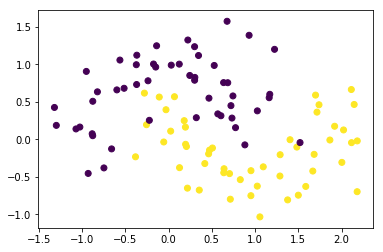

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
X.shape

(100, 2)

## decision tree classifier (from scratch)

In [8]:
# criterion for choosing the best split
def gini(arr,classes):
    gin=0
    for k in classes:
        pk = len(np.where(arr[:,-1]==k)[0])/len(arr)
        gin = gin + pk*(1-pk)
    return gin

In [9]:
gini(dataset,[0,1])

0.5

In [10]:
def split(dat,ivar,val):
    left = []
    right = []
    for j in range(len(dat)):
        if dat[j,ivar] < val:
            left.append(dat[j])
        else:
            right.append(dat[j])
    left = np.array(left).reshape((-1,len(left[0])))
    right = np.array(right).reshape((-1,len(right[0])))
    return left, right

In [11]:
left,right = split(dataset,0,1.)


In [12]:
right.shape

(29, 3)

In [13]:
def best_split(dat, X_types, nCuts):
    Xdim = len(X_types)
    split_res = []
    for i in range(Xdim): #loop over variables
        print('..checking splits in variable x'+str(i))
        if(X_types[i]=='c'):
            cut_vals = np.linspace(np.min(dat[:,i]),np.max(dat[:,i]),num=nCuts)[1:-1]
        for cval in cut_vals:
            left, right = split(dat,i,cval)
            giniL, giniR = gini(left,[0,1]), gini(right,[0,1])
            PL, PR = len(left)/len(dat), len(right)/len(dat)
            Gsplit = giniL*PL + giniR*PR
            split_res.append([i,cval,Gsplit])
    best = split_res[np.argmin(np.array(split_res)[:,2])]
    return {'var':best[0], 'value':best[1], 'left':split(dat,best[0],best[1])[0],
            'right':split(dat,best[0],best[1])[1]}
            

In [14]:
bestsplit=best_split(dataset,['c','c'], 40)
bestsplit['var']

..checking splits in variable x0
..checking splits in variable x1


1

In [15]:
def val_terminal(dat):
    y_set = np.array(dat[:,-1])
    argmx = np.argmax(np.unique(y_set, return_counts=True)[1])
    return np.unique(y_set,return_counts=True)[0][argmx]


node : the output of best_split

In [16]:
def grow(node, max_depth, min_size, depth):
    left, right = node['left'], node['right']
    del(node['left'])
    del(node['right'])
    # check for empty left or right, leading to a terminal
    if len(left)==0 or len(right)==0:
        print('empty left or right')
        node['left'] = node['right'] = val_terminal(left+right)
        return
    # check for max depth, leading to a terminal
    if depth >= max_depth:
        print('max depth reached')
        node['left'], node['right'] = val_terminal(left), val_terminal(right)
        print('  values. left: ',node['left'],' right:',node['right'])
        return
    # grow left branch
    if(len(left)<=min_size):
        node['left']=val_terminal(left)
        print('  min size found in left branch. left value = ',node['left'])
    else:
        print('..growing left branch')
        node['left'] = best_split(left,X_types, nCuts)
        print('depth: ',depth,', var: x'+str(node['left']['var']),', val:',node['left']['value'])
        grow(node['left'],max_depth,min_size,depth+1)
    # grow right branch
    if(len(right)<=min_size):
        node['right']=val_terminal(right)
        print('  min size found in right branch. right value = ',node['right'])
    else:
        print('..growing right branch')
        node['right'] = best_split(right,X_types, nCuts)
        print('depth: ',depth,', var: x'+str(node['right']['var']),', val:',node['right']['value'])
        grow(node['right'],max_depth,min_size,depth+1)
    
    

In [17]:
def build_tree(train, max_depth, min_size):
    root = best_split(train,X_types,nCuts)
    print('root node. variable, value:',root['var'],root['value'])
    grow(root,max_depth,min_size,1)
    return root
    

In [18]:
X_types=['c','c']
nCuts=40

In [19]:
build_tree(dataset,4,1)

..checking splits in variable x0
..checking splits in variable x1
root node. variable, value: 1 0.03408311380203832
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  1 , var: x0 , val: -0.6096128329741091
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  2 , var: x0 , val: -0.9216457634043352
  min size found in left branch. left value =  0.0
..growing right branch
..checking splits in variable x0
..checking splits in variable x1
depth:  3 , var: x0 , val: -0.7443581969384301
max depth reached
  values. left:  0.0  right: 0.0
..growing right branch
..checking splits in variable x0
..checking splits in variable x1
depth:  2 , var: x1 , val: -0.08618354843920062
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  3 , var: x0 , val: -0.3157901519134769
max depth reached
  values. left:  1.0  right: 1.0
..growing right branch
..checking splits in variable 

{'left': {'left': {'left': 0.0,
   'right': {'left': 0.0,
    'right': 0.0,
    'value': -0.7443581969384301,
    'var': 0},
   'value': -0.9216457634043352,
   'var': 0},
  'right': {'left': {'left': 1.0,
    'right': 1.0,
    'value': -0.3157901519134769,
    'var': 0},
   'right': {'left': 0.0,
    'right': 1.0,
    'value': -0.07399454104901507,
    'var': 1},
   'value': -0.08618354843920062,
   'var': 1},
  'value': -0.6096128329741091,
  'var': 0},
 'right': {'left': {'left': {'left': 0.0,
    'right': 0.0,
    'value': 0.21311556496481954,
    'var': 0},
   'right': {'left': 0.0,
    'right': 0.0,
    'value': -0.8942551940394393,
    'var': 0},
   'value': 0.6332327833598644,
   'var': 1},
  'right': {'left': 1.0,
   'right': {'left': 1.0, 'right': 1.0, 'value': 1.726820640989542, 'var': 0},
   'value': 1.7108971998610332,
   'var': 0},
  'value': 1.257497939772651,
  'var': 0},
 'value': 0.03408311380203832,
 'var': 1}

In [20]:
def predict(node,row):
    if(row[node['var']] < node['value']):
        if isinstance(node['left'],dict):
            return predict(node['left'],row)
        else:
            return node['left']
    else:
        if isinstance(node['right'],dict):
            return predict(node['right'],row)
        else:
            return node['right']

In [21]:
def decision_tree(train,test,max_depth,min_size):
    tree = build_tree(train,max_depth,min_size)
    print('***********************')
    print('tree=\n',tree)
    predictions = []
    for row in test:
        predictions.append(predict(tree,row))
    return predictions

In [22]:
def score(obs, pred):
    correct = 0
    for i in range(len(obs)):
        if obs[i] == pred[i]:
            correct += 1
    return correct / len(obs)

### main routine now:

In [23]:
# split dataset in training and test
np.random.seed(1)
perm = np.random.permutation(len(dataset))
dataset = dataset[perm]
test_size = int(0.2*len(dataset))
test_data = dataset[:test_size]
train_data = dataset[test_size:]

In [24]:
predicted = decision_tree(train_data, test_data, 4, 1)

..checking splits in variable x0
..checking splits in variable x1
root node. variable, value: 1 -0.009327970525967011
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  1 , var: x0 , val: -0.5964755582706589
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  2 , var: x0 , val: -0.7443581969384301
  min size found in left branch. left value =  0.0
  min size found in right branch. right value =  0.0
..growing right branch
..checking splits in variable x0
..checking splits in variable x1
depth:  2 , var: x1 , val: -0.08268855718990309
..growing left branch
..checking splits in variable x0
..checking splits in variable x1
depth:  3 , var: x0 , val: 0.17543689774672622
max depth reached
  values. left:  1.0  right: 1.0
..growing right branch
..checking splits in variable x0
..checking splits in variable x1
depth:  3 , var: x1 , val: -0.07440121961667097
max depth reached
  values. left:  0.0  right: 1

In [25]:
predicted

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0]

In [26]:
test_data[:,-1]

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1.])

In [27]:
model_score = score(test_data[:,-1], predicted)
print(model_score)

0.95


## to implement cross-validation on this (K=5)

# compare with scikit-learn models

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=4)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
X_train = train_data[:,:-1]
y_train = train_data[:,-1]
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

classifier.score(X_test, y_test)

0.9

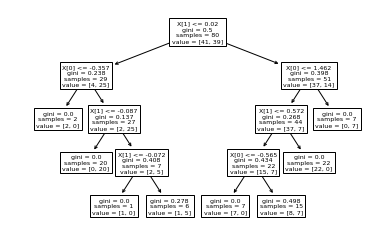

In [34]:
plot_tree(classifier)
plt.show()

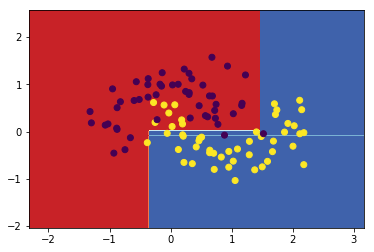

In [35]:
x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## check performance of logistic regression classifier

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression(solver='lbfgs', penalty='none')

In [38]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
clf.score(X_test, y_test)

0.85

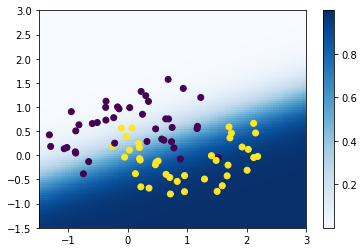

In [40]:
xx=np.linspace(-1.5,3,100)
yy=np.linspace(-1.5,3,100)
xx, yy = np.meshgrid(xx, yy)
Xfull = np.hstack((xx.reshape((-1,1)), yy.reshape((-1,1)) ))

probas = clf.predict_proba(Xfull)
probs_1_grid = probas[:,1].reshape((100,100))

plt.pcolormesh(xx,yy,probs_1_grid,cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.scatter(train_data[:,:-1][:,0],train_data[:,:-1][:,1],c=train_data[:,-1])
plt.show()